In [8]:
import torch
import torch.nn as nn
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 5)
        self.fc2 = nn.Linear(5, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()


In [9]:
def show_network_graph(model):
    G = nx.DiGraph()
    layers = [3, 5, 2]

    pos = {}
    node_labels = {}

    node_id = 0
    layer_nodes = [] 

    for layer_idx, n_neurons in enumerate(layers):
        current_layer_nodes = []
        y_spacing = 1.0 / (n_neurons + 1)
        x = layer_idx 
        for i in range(n_neurons):
            node_name = f"L{layer_idx}_N{i}"
            G.add_node(node_id)
            pos[node_id] = (x, 1 - (i + 1)*y_spacing) 
            node_labels[node_id] = ''  
            current_layer_nodes.append(node_id)
            node_id += 1
        layer_nodes.append(current_layer_nodes)

    weights_fc1 = model.fc1.weight.detach().numpy()
    weights_fc2 = model.fc2.weight.detach().numpy() 

    for h_idx, hidden_node in enumerate(layer_nodes[1]):
        for i_idx, input_node in enumerate(layer_nodes[0]):
            weight = weights_fc1[h_idx, i_idx]
            G.add_edge(input_node, hidden_node, weight=weight)

    for o_idx, output_node in enumerate(layer_nodes[2]):
        for h_idx, hidden_node in enumerate(layer_nodes[1]):
            weight = weights_fc2[o_idx, h_idx]
            G.add_edge(hidden_node, output_node, weight=weight)

    plt.figure(figsize=(12, 6))
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')

    edges = G.edges(data=True)
    weights = [abs(d['weight']) for (u,v,d) in edges]
    max_w = max(weights)
    widths = [3 * (w / max_w) for w in weights]

    nx.draw_networkx_edges(G, pos, width=widths, alpha=0.7, arrows=True)

    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    plt.title("Fully Connected Neural Network Visualization")
    plt.axis('off')
    plt.show()


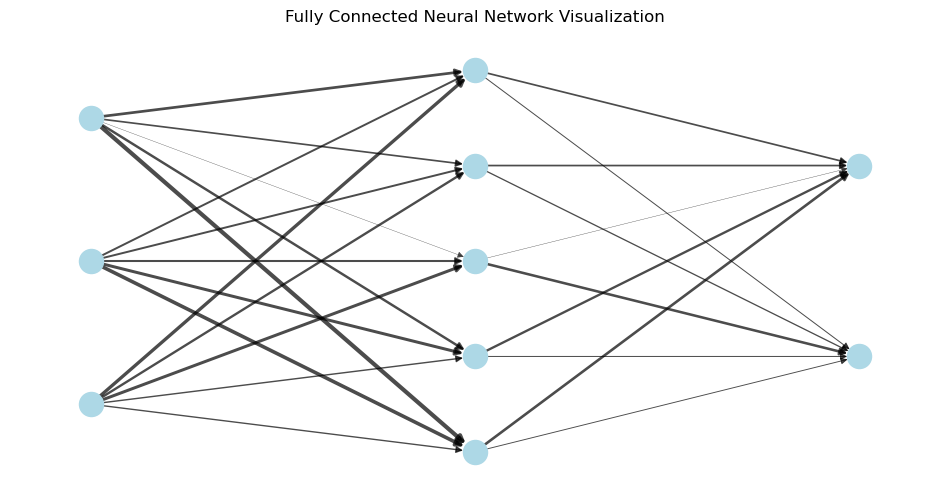

In [10]:
show_network_graph(model)

In [11]:
with torch.no_grad():
    for name, param in model.named_parameters():
        if "weight" in name:
            mask = (torch.rand_like(param) > 0.8).float()
            param.mul_(mask)

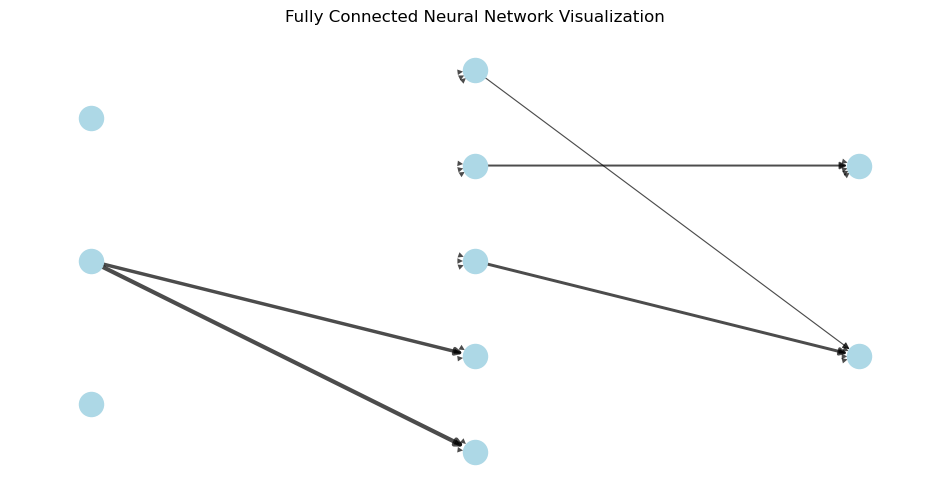

In [12]:
show_network_graph(model)